In [1]:
# Relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload 2

In [4]:
# Double checks the current python path
import sys  
print(sys.path)

['C:\\Users\\ishwo\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'C:\\Users\\ishwo\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'C:\\Users\\ishwo\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'C:\\Users\\ishwo\\AppData\\Local\\Programs\\Python\\Python312', 'c:\\Users\\ishwo\\.venvs\\B1ScientifiCodingVenV', '', 'c:\\Users\\ishwo\\.venvs\\B1ScientifiCodingVenV\\Lib\\site-packages', 'c:\\Users\\ishwo\\.venvs\\B1ScientifiCodingVenV\\Lib\\site-packages\\win32', 'c:\\Users\\ishwo\\.venvs\\B1ScientifiCodingVenV\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ishwo\\.venvs\\B1ScientifiCodingVenV\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\ishwo\\OneDrive - Nexus365\\University\\Year 3\\B1\\1. Scientific Coding\\b1-coding-practical-mt24']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

In [5]:
# Imports relevant modules
import sys
import os
import numpy as np

# Adds the B1-CODING-PRACTICAL-MT24 directory to the Python path
sys.path.append(os.path.abspath('..'))

# Imports custom classes and functions
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import PDController

Finding the Best Contoller Gains

In [6]:
# the range of values for controller gains and initialised matrix to store the errors for each combination
KP_VALUES = np.linspace(0, 1, 50)
KD_VALUES = np.linspace(0, 1, 50)
KpKdError = np.zeros((len(KP_VALUES), len(KD_VALUES)))
num_missions = 50
# finding the best value of Kp and Kd averaged over 50 random missions
for i in range(num_missions):
    # creating one of the 50 random missions
    mission = Mission.random_mission(100, 20)
    # looping through all the combinations of Kp and Kd values
    for kp_index, Kp in enumerate(KP_VALUES):
        for kd_index, Kd in enumerate(KD_VALUES):
            sub = Submarine()
            controller = PDController(K_P=Kp, K_D=Kd)
            closed_loop = ClosedLoop(sub, controller)
            trajectory = closed_loop.simulate_with_random_disturbances(mission)
            total_squared_error = trajectory.squared_error(mission)
            KpKdError[kp_index, kd_index] += total_squared_error

# Calculate the mean error over the 100 simulations
KpKdError /= num_missions

# Find the indices of the minimum error
min_error_index = np.unravel_index(np.argmin(KpKdError), KpKdError.shape)
best_Kp = round(KP_VALUES[min_error_index[0]],4)
best_Kd = round(KD_VALUES[min_error_index[1]],4)

print(f"Best Kp: {best_Kp}, Best Kd: {best_Kd}, Minimum Mean Error: {KpKdError[min_error_index]}")

Best Kp: 0.0408, Best Kd: 0.8776, Minimum Mean Error: 3260.2760463197187


Comparing Errors of Inital gain values and optimal gain values

Controller With Initial Kp and Kd values
Error Squared is: 967.6983457835762


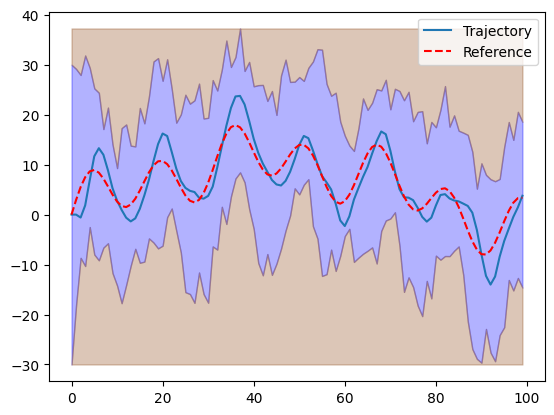

Controller With Optimal Kp and Kd values
Error Squared is: 660.7534435826371


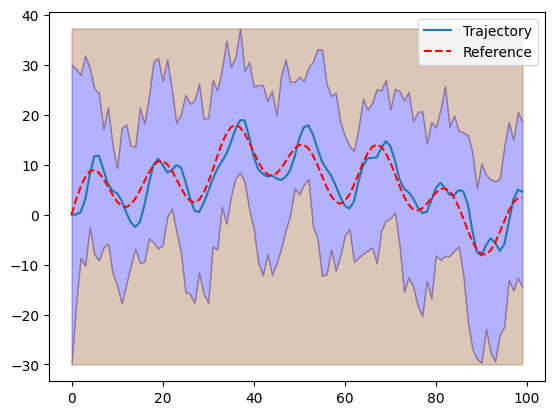

In [7]:
# Controller with Original Kp and Kd values
sub = Submarine()
controller = PDController(K_P=0.15, K_D=0.6)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("../data/mission.csv") 
trajectory = closed_loop.simulate_with_random_disturbances(mission)
print("Controller With Initial Kp and Kd values")
print(f"Error Squared is: {trajectory.squared_error(mission)}")
trajectory.plot_completed_mission(mission)


# Controller with optimal Kp and Kd values        
sub = Submarine()
controller = PDController(K_P=best_Kp, K_D=best_Kd)
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("../data/mission.csv") 
trajectory = closed_loop.simulate_with_random_disturbances(mission)
print("Controller With Optimal Kp and Kd values")
print(f"Error Squared is: {trajectory.squared_error(mission)}")
trajectory.plot_completed_mission(mission)
